(array([1., 0., 1., 1., 0., 1., 2., 0., 2., 3.]),
 array([0.98999172, 1.00100906, 1.0120264 , 1.02304374, 1.03406108,
        1.04507842, 1.05609576, 1.0671131 , 1.07813045, 1.08914779,
        1.10016513]),
 <BarContainer object of 10 artists>)

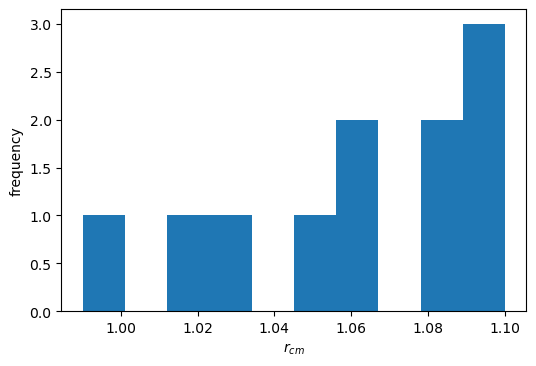

In [26]:
##routine to extract the center of mass coordinate and from that the probability distribution


import numpy as np
import matplotlib.pyplot as plt

#simulation parameters
natoms = 37 ##number of atoms
tmax = 500 #simulation time
prnt = 50 #printout every
frames = (int)(tmax/prnt) ##no of frames


##first need to to some post-processing of the data
##leave out lines that contain text
file = []
fp = open("cl12w-nos.dt98")
for i, line in enumerate(fp):
    #leave out first and second line of first frame
    if i<2:
        pass
    #leave out first and second line of every remaining frame
    elif ((i%(natoms+2))==0) or (i%(natoms+2))==1:
        pass
    else:
        file.append(line)
        #print(i)
        
        
#convert to float array using loadtxt
data = np.loadtxt(file)
#print(data)


t = np.arange(0,tmax+1,prnt) #time in fs
masses = data[:,0]
coordinates = data[:,1:]

#reshape arrays
masses = masses.reshape((int)(len(masses)/natoms),natoms)
coordinates = coordinates.reshape((int)(len(coordinates)/natoms),natoms,3)


rcms = np.array([]) ##rcm values
##calculate rcm coordinates:
M = sum(masses[0]) ##total mass

##loop over frames
for i in range(len(t)):
    cm = np.zeros(3)
    #loop over coordinates
    for j in range(3):
        #loop over atoms
        for k in range(natoms):
            cm[j] += coordinates[i,k,j]*masses[i,k]
        cm[j] /= M
    rcm = coordinates[i,0]-cm
    norm = np.linalg.norm(rcm)
    rcms = np.append(rcms,norm)
    
    
##plot histogram
plt.figure(dpi=100)
plt.xlabel("$r_{cm}$")
plt.ylabel("frequency")
plt.hist(rcms,bins=10)


